In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('dataset/receipt_data.csv',
                index_col='nyuten_date',
#               Converting indexes to datetime type
                parse_dates=True)
df

,ID,kaikei_date,menu,category,tanka,suuryo,goukei,male,female,unknown
nyuten_date,,,,,,,,,,
2019-04-01 17:28:00,15759,2019/4/1 18:29,food6,food,390,1,390,2,4,0
2019-04-01 18:22:00,15760,2019/4/1 18:39,alcohol1,alcohol,500,3,1500,1,0,0
2019-04-01 17:10:00,15761,2019/4/1 18:49,food248,food,700,1,700,1,4,0
2019-04-01 18:30:00,15768,2019/4/1 20:01,food221,food,580,1,580,3,2,0
2019-04-01 18:12:00,15770,2019/4/1 20:16,food259,food,580,1,580,1,0,0
...,...,...,...,...,...,...,...,...,...,...
2019-09-30 19:01:00,26582,2019/9/30 21:20,food87,food,700,1,700,0,2,0
2019-09-30 20:23:00,26587,2019/9/30 22:19,food1,food,390,1,390,0,2,0
2019-09-30 19:32:00,26588,2019/9/30 23:18,food22,food,399,1,399,0,2,0


In [3]:
df.loc['2019-9-1':'2019-9-30']

<ipython-input-3-6036705247e5>:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df.loc['2019-9-1':'2019-9-30']


,ID,kaikei_date,menu,category,tanka,suuryo,goukei,male,female,unknown
nyuten_date,,,,,,,,,,
2019-09-01 17:02:00,25113,2019/9/1 18:05,food85,food,600,1,600,5,0,0
2019-09-01 17:02:00,25113,2019/9/1 18:05,food18,food,690,1,690,5,0,0
2019-09-01 17:19:00,25114,2019/9/1 18:37,food41,food,580,1,580,3,1,0
2019-09-01 17:19:00,25114,2019/9/1 18:37,food163,food,650,2,1300,3,1,0
2019-09-01 17:19:00,25114,2019/9/1 18:37,food24,food,1400,1,1400,3,1,0
...,...,...,...,...,...,...,...,...,...,...
2019-09-30 19:01:00,26582,2019/9/30 21:20,food87,food,700,1,700,0,2,0
2019-09-30 20:23:00,26587,2019/9/30 22:19,food1,food,390,1,390,0,2,0
2019-09-30 19:32:00,26588,2019/9/30 23:18,food22,food,399,1,399,0,2,0


In [4]:
df.resample('M').sum()

,ID,tanka,suuryo,goukei,male,female,unknown
nyuten_date,,,,,,,
2019-04-30,17332839,564314,1260,648091,1636,1247,33
2019-05-31,23192538,639654,1527,751610,2008,1413,27
2019-06-30,21911631,563171,1304,656439,1997,1200,46
2019-07-31,21217926,532692,1158,627444,1486,1182,35
2019-08-31,26901440,596000,1362,697296,1942,1371,82
2019-09-30,22002114,458988,1045,538822,1304,862,141


In [5]:
df['goukei'].resample('M').agg(['sum', 'mean', 'max', 'min'])

,sum,mean,max,min
nyuten_date,,,,
2019-04-30,648091,624.967213,3200,100
2019-05-31,751610,603.702811,3996,100
2019-06-30,656439,615.796435,5994,120
2019-07-31,627444,657.698113,9960,140
2019-08-31,697296,623.142091,3500,120
2019-09-30,538822,633.163337,4400,140


In [6]:
df['goukei'].resample('Q').agg(['sum', 'mean', 'max', 'min'])

,sum,mean,max,min
nyuten_date,,,,
2019-06-30,2056140,614.139785,5994,100
2019-09-30,1863562,637.333105,9960,120


In [7]:
df['weekday'] = df.index.weekday

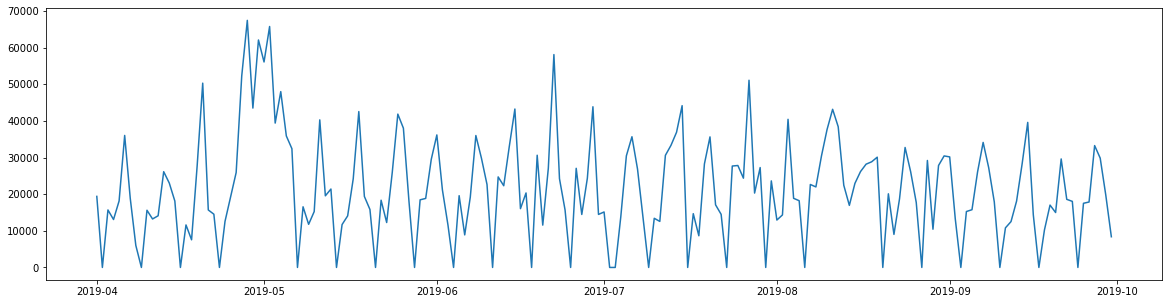

In [8]:
df_sale_sum_D = df['goukei'].resample('D').sum()

figsize = (20, 5)
fig, ax = plt.subplots(figsize=figsize)
plt.plot(df_sale_sum_D)

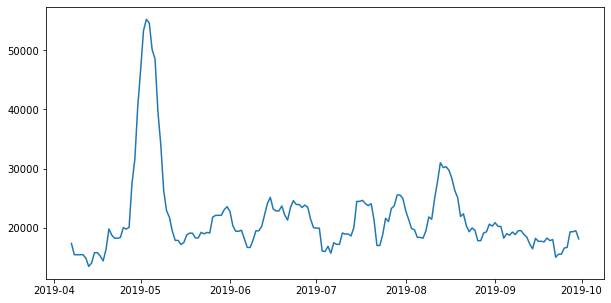

In [9]:
df_sale_sum_D_mv_7 = df['goukei'].resample('D').sum().rolling(window=7).mean()

figsize=(10, 5)
fig, ax = plt.subplots(figsize=figsize)
plt.plot(df_sale_sum_D_mv_7)


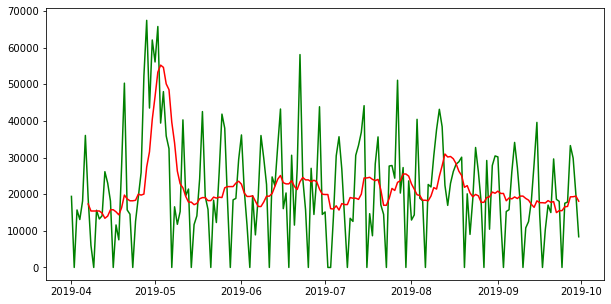

In [10]:
figsize=(10, 5)
fig, ax = plt.subplots(figsize=figsize)
plt.plot(df_sale_sum_D, c='g')
plt.plot(df_sale_sum_D_mv_7, c='r')

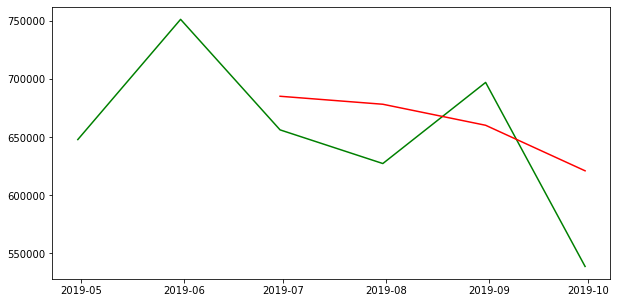

In [11]:
df_sale_sum_M = df['goukei'].resample('M').sum()
df_sale_sum_M_mv_7 = df['goukei'].resample('M').sum().rolling(window=3).mean()

figsize=(10, 5)
fig, ax = plt.subplots(figsize=figsize)
plt.plot(df_sale_sum_M, c='g')
plt.plot(df_sale_sum_M_mv_7, c='r')

In [12]:
cols = ['ID','kaikei_date','goukei','male','female','unknown']
df_id = df[cols]

dup = df_id.duplicated()

df_id = df_id[np.logical_not(dup)]

df_id

,ID,kaikei_date,goukei,male,female,unknown
nyuten_date,,,,,,
2019-04-01 17:28:00,15759,2019/4/1 18:29,390,2,4,0
2019-04-01 18:22:00,15760,2019/4/1 18:39,1500,1,0,0
2019-04-01 17:10:00,15761,2019/4/1 18:49,700,1,4,0
2019-04-01 18:30:00,15768,2019/4/1 20:01,580,3,2,0
2019-04-01 18:12:00,15770,2019/4/1 20:16,580,1,0,0
...,...,...,...,...,...,...
2019-09-30 19:01:00,26582,2019/9/30 21:20,700,0,2,0
2019-09-30 20:23:00,26587,2019/9/30 22:19,390,0,2,0
2019-09-30 19:32:00,26588,2019/9/30 23:18,399,0,2,0


In [13]:
df_id['customer_num'] = df_id['male'] + df_id['female'] + df_id['unknown']
df_id

,ID,kaikei_date,goukei,male,female,unknown,customer_num
nyuten_date,,,,,,,
2019-04-01 17:28:00,15759,2019/4/1 18:29,390,2,4,0,6
2019-04-01 18:22:00,15760,2019/4/1 18:39,1500,1,0,0,1
2019-04-01 17:10:00,15761,2019/4/1 18:49,700,1,4,0,5
2019-04-01 18:30:00,15768,2019/4/1 20:01,580,3,2,0,5
2019-04-01 18:12:00,15770,2019/4/1 20:16,580,1,0,0,1
...,...,...,...,...,...,...,...
2019-09-30 19:01:00,26582,2019/9/30 21:20,700,0,2,0,2
2019-09-30 20:23:00,26587,2019/9/30 22:19,390,0,2,0,2
2019-09-30 19:32:00,26588,2019/9/30 23:18,399,0,2,0,2


In [14]:
df_sale_sum_M = df['goukei'].resample('M').sum()

df_kyakusu_sum_M = df_id['customer_num'].resample('M').sum()

df_kyakutanka_M = df_sale_sum_M / df_kyakusu_sum_M

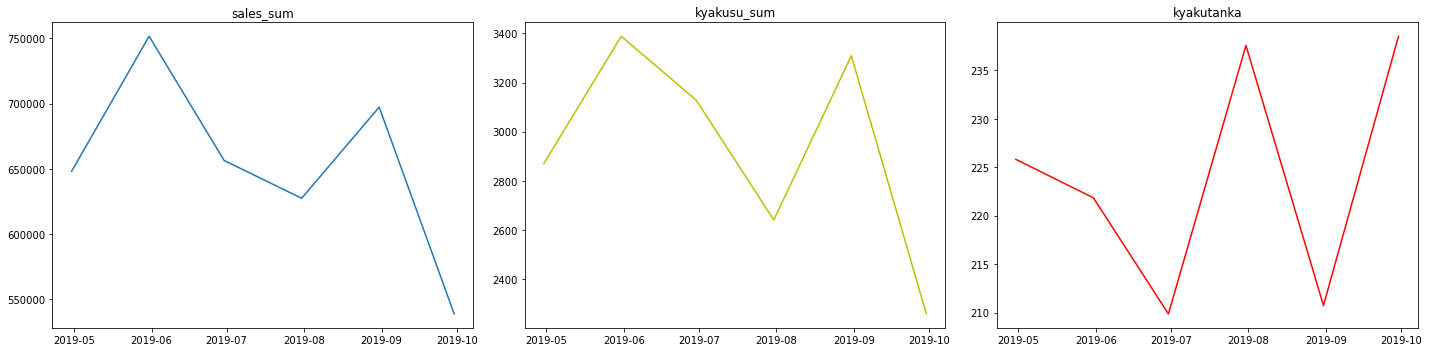

In [15]:
figsize = (20, 5)

fig, ax = plt.subplots(1, 3, figsize=figsize)

ax[0].plot(df_sale_sum_M)
ax[0].set_title('sales_sum')

ax[1].plot(df_kyakusu_sum_M, c='y')
ax[1].set_title('kyakusu_sum')

ax[2].plot(df_kyakutanka_M, c='r')
ax[2].set_title('kyakutanka')

plt.tight_layout()

In [16]:
df_id['hour'] = df_id.index.hour
df_id

,ID,kaikei_date,goukei,male,female,unknown,customer_num,hour
nyuten_date,,,,,,,,
2019-04-01 17:28:00,15759,2019/4/1 18:29,390,2,4,0,6,17
2019-04-01 18:22:00,15760,2019/4/1 18:39,1500,1,0,0,1,18
2019-04-01 17:10:00,15761,2019/4/1 18:49,700,1,4,0,5,17
2019-04-01 18:30:00,15768,2019/4/1 20:01,580,3,2,0,5,18
2019-04-01 18:12:00,15770,2019/4/1 20:16,580,1,0,0,1,18
...,...,...,...,...,...,...,...,...
2019-09-30 19:01:00,26582,2019/9/30 21:20,700,0,2,0,2,19
2019-09-30 20:23:00,26587,2019/9/30 22:19,390,0,2,0,2,20
2019-09-30 19:32:00,26588,2019/9/30 23:18,399,0,2,0,2,19


In [17]:
df_id['wd'] = df_id.index.weekday
df_id

,ID,kaikei_date,goukei,male,female,unknown,customer_num,hour,wd
nyuten_date,,,,,,,,,
2019-04-01 17:28:00,15759,2019/4/1 18:29,390,2,4,0,6,17,0
2019-04-01 18:22:00,15760,2019/4/1 18:39,1500,1,0,0,1,18,0
2019-04-01 17:10:00,15761,2019/4/1 18:49,700,1,4,0,5,17,0
2019-04-01 18:30:00,15768,2019/4/1 20:01,580,3,2,0,5,18,0
2019-04-01 18:12:00,15770,2019/4/1 20:16,580,1,0,0,1,18,0
...,...,...,...,...,...,...,...,...,...
2019-09-30 19:01:00,26582,2019/9/30 21:20,700,0,2,0,2,19,0
2019-09-30 20:23:00,26587,2019/9/30 22:19,390,0,2,0,2,20,0
2019-09-30 19:32:00,26588,2019/9/30 23:18,399,0,2,0,2,19,0


In [18]:
df

,ID,kaikei_date,menu,category,tanka,suuryo,goukei,male,female,unknown,weekday
nyuten_date,,,,,,,,,,,
2019-04-01 17:28:00,15759,2019/4/1 18:29,food6,food,390,1,390,2,4,0,0
2019-04-01 18:22:00,15760,2019/4/1 18:39,alcohol1,alcohol,500,3,1500,1,0,0,0
2019-04-01 17:10:00,15761,2019/4/1 18:49,food248,food,700,1,700,1,4,0,0
2019-04-01 18:30:00,15768,2019/4/1 20:01,food221,food,580,1,580,3,2,0,0
2019-04-01 18:12:00,15770,2019/4/1 20:16,food259,food,580,1,580,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2019-09-30 19:01:00,26582,2019/9/30 21:20,food87,food,700,1,700,0,2,0,0
2019-09-30 20:23:00,26587,2019/9/30 22:19,food1,food,390,1,390,0,2,0,0
2019-09-30 19:32:00,26588,2019/9/30 23:18,food22,food,399,1,399,0,2,0,0


In [19]:
def replace_weekday(row):
    if row == 0:
        return "Mon"
    elif row == 1:
        return "Tue"
    elif row == 2:
        return "Wed"
    elif row == 3:
        return "Thu"
    elif row == 4:
        return "Fri"
    elif row == 5:
        return "Sat"
    elif row == 6:
        return "Sun"
    else:
        return "Unknown"

In [20]:
df['weekday_str'] = df['weekday'].apply(replace_weekday)
df

,ID,kaikei_date,menu,category,tanka,suuryo,goukei,male,female,unknown,weekday,weekday_str
nyuten_date,,,,,,,,,,,,
2019-04-01 17:28:00,15759,2019/4/1 18:29,food6,food,390,1,390,2,4,0,0,Mon
2019-04-01 18:22:00,15760,2019/4/1 18:39,alcohol1,alcohol,500,3,1500,1,0,0,0,Mon
2019-04-01 17:10:00,15761,2019/4/1 18:49,food248,food,700,1,700,1,4,0,0,Mon
2019-04-01 18:30:00,15768,2019/4/1 20:01,food221,food,580,1,580,3,2,0,0,Mon
2019-04-01 18:12:00,15770,2019/4/1 20:16,food259,food,580,1,580,1,0,0,0,Mon
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-30 19:01:00,26582,2019/9/30 21:20,food87,food,700,1,700,0,2,0,0,Mon
2019-09-30 20:23:00,26587,2019/9/30 22:19,food1,food,390,1,390,0,2,0,0,Mon
2019-09-30 19:32:00,26588,2019/9/30 23:18,food22,food,399,1,399,0,2,0,0,Mon


In [23]:
df['weekday_str'].unique()

array(['Mon', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'Tue'], dtype=object)